# Running the HCT Algorithm on the Normalized Himmelblau Function

First of all, the required packages need to be loaded. Note that "import sys" and "sys.path.append("../") are not required when writing .py codes.

In [1]:
import sys
sys.path.append("../") # go to parent dir

from PyXAB.synthetic_obj import *
from PyXAB.algos.HCT import HCT
from PyXAB.partition.BinaryPartition import BinaryPartition

import numpy as np
from PyXAB.utils.plot import plot_regret


After that, the number of rounds, the target, the parameter domain, and the optimization algorithm needs to be defined. Note that for the partition, it is not instantiated but instead directly fed into the HCT algorithm. This is true for all the algorithms in this package.

In [2]:
# Define the number of rounds, target, domain, partition, and algorithm
T = 1000
target = HimmelBlau.Himmelblau_Normalized()
domain = [[-5, 5], [-5, 5]]
partition = BinaryPartition
algo = HCT(domain=domain, partition=partition)


The regret list is used to record the cumulative regret for visualization

In [3]:
# regret and regret list
cumulative_regret = 0
cumulative_regret_list = []

The following lines of code runs the algorithm and record the cumulative regret

In [4]:

# uniform noise
for t in range(1, T+1):

    point = algo.pull(t)
    reward = target.f(point) + np.random.uniform(-0.1, 0.1)
    algo.receive_reward(t, reward)
    inst_regret = target.fmax - target.f(point)
    cumulative_regret += inst_regret
    cumulative_regret_list.append(cumulative_regret)


../PyXAB/algos/HCT.py:15: RuntimeWarning: divide by zero encountered in log
  return np.power(2, np.ceil(np.log(x) / np.log(2)))
../PyXAB/algos/HCT.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1.0/2, self.c1 * self.delta / t_plus)
../PyXAB/algos/HCT.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)
../PyXAB/algos/HCT.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  delta_tilde = np.minimum(1, self.c1 * self.delta / t_plus)


The cumulative regret is then plotted

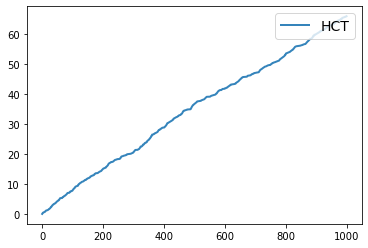

In [5]:

# plot the regret
plot_regret(np.array(cumulative_regret_list), name='HCT')